<a href="https://colab.research.google.com/github/mupotsal/Decision-Trees-/blob/main/Decision_trees_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Train and fine-tune a Decision Tree for the moons dataset.
a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).


In [ ]:
import numpy as np
np.random.seed(42)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [ ]:
# Describe the data
print(X)
print(X.shape)
print(y.shape)

[[ 0.9402914   0.12230559]
 [ 0.12454026 -0.42477546]
 [ 0.26198823  0.50841438]
 ...
 [-0.24177973  0.20957199]
 [ 0.90679645  0.54958215]
 [ 2.08837082 -0.05050728]]
(10000, 2)
(10000,)


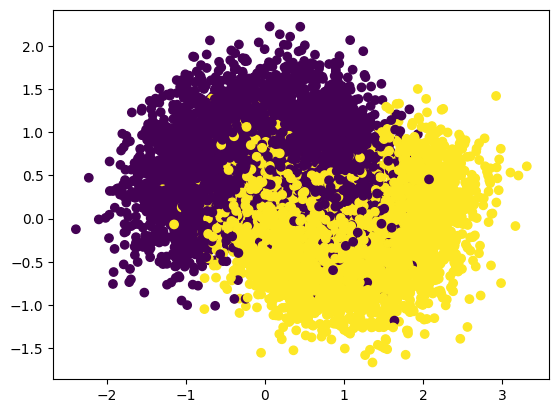

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

b. Split it into a training set and a test set using train_test_split().
178 | Chapter 6: Decision Trees
Downl oad from fi nel ybook www. fi nel ybook. com


In [ ]:
# Split it into a training set and a test set using train_test_split().
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.


In [ ]:
# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': np.arange(2, 200)}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree_clf, param_grid, cv=5)

grid_search_cv.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search_cv.best_params_)

Best hyperparameters:  {'max_leaf_nodes': np.int64(23)}


d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. Y ou should get roughly 85% to 87%
accuracy.

In [ ]:
#  Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. Y ou should get roughly 85% to 87% accuracy.
from sklearn.metrics import accuracy_score

best_tree_clf = grid_search_cv.best_estimator_
y_pred = best_tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

Accuracy on the test set: 87.35%
